In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as MAE
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
from dateutil import parser

# Спрос

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     80.138145
49     98.410185
50    108.383412
Name: predicted_mean, dtype: float64


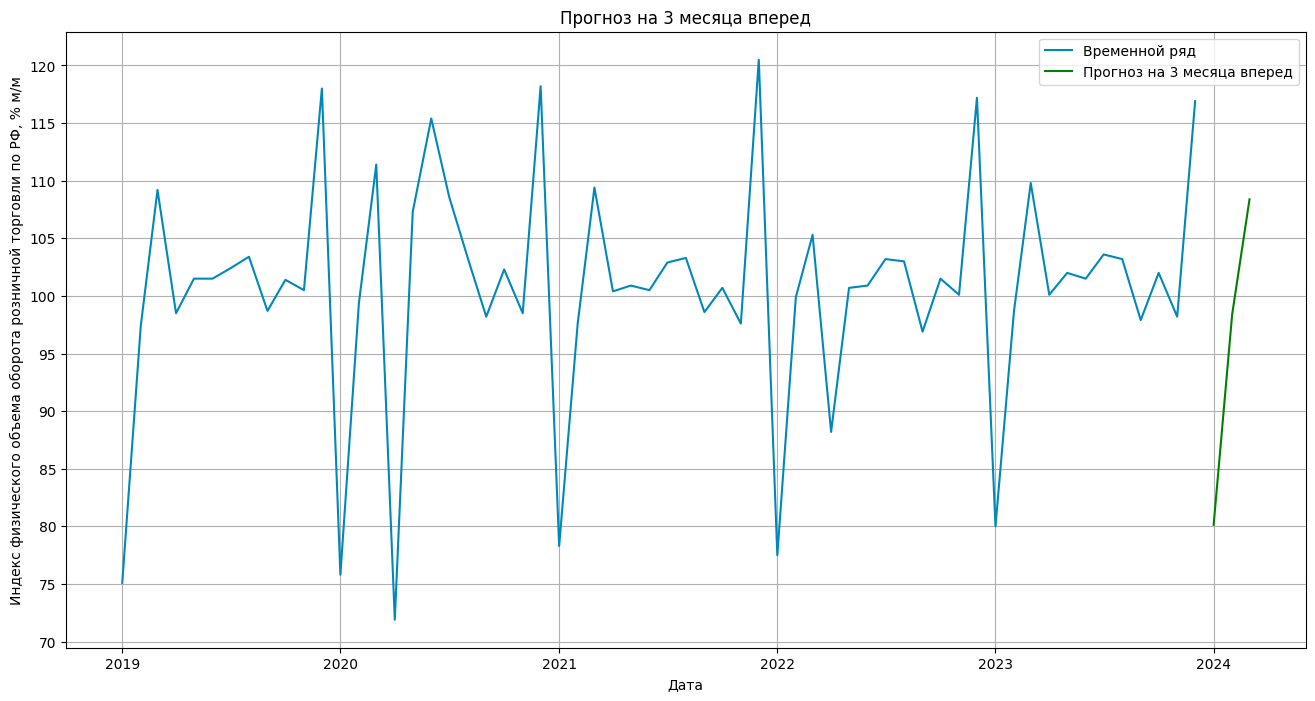

In [3]:
df = pd.read_excel('Задание.xlsx')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)
data_index = df[['Дата', 'Индекс физического объема оборота розничной торговли по РФ, % м/м']].copy()

with open('demand_rf_mom.pkl', 'rb') as f:
    SARIMA_result = pickle.load(f)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по РФ, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по РФ, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     76.039459
49     96.963207
50    109.039723
Name: predicted_mean, dtype: float64


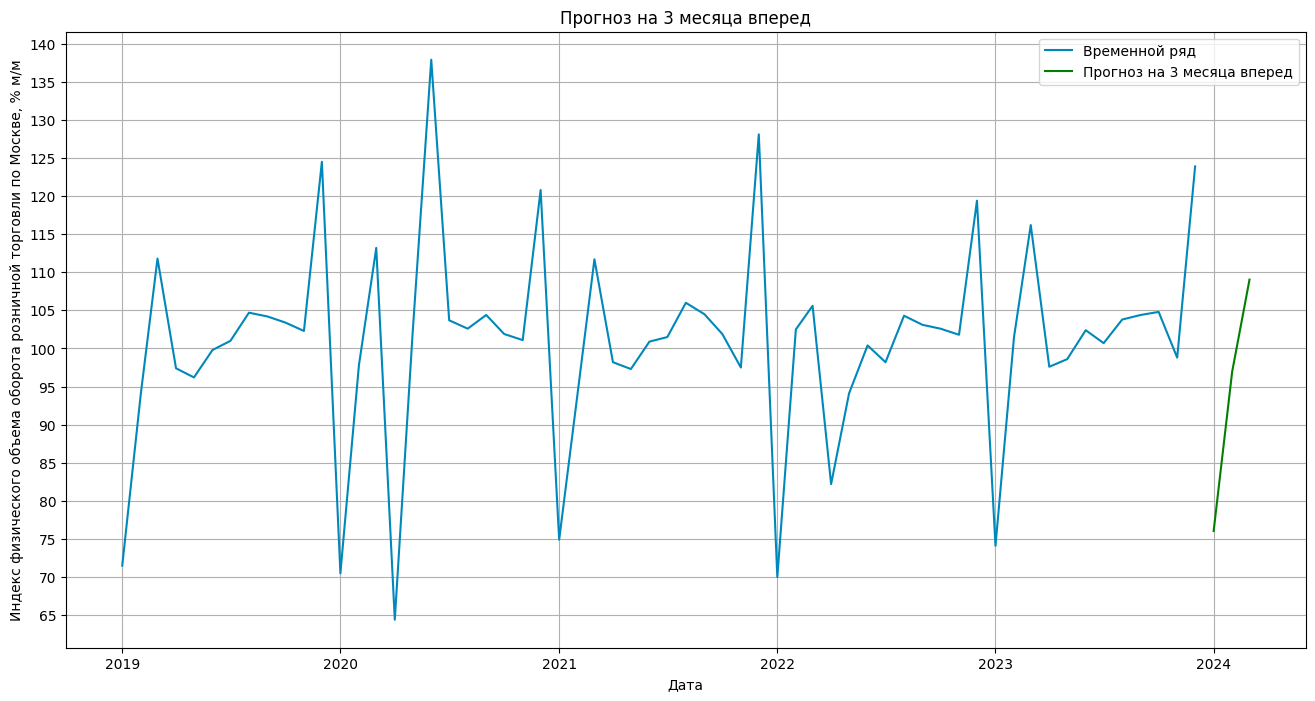

In [5]:
df = pd.read_excel('Задание.xlsx')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)
data_index = df[['Дата', 'Индекс физического объема оборота розничной торговли по Москве, % м/м']].copy()

with open('demand_m_mom.pkl', 'rb') as f:
    SARIMA_result = pickle.load(f)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(60, 160+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по Москве, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Москве, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     82.975076
49     96.935994
50    111.769932
Name: predicted_mean, dtype: float64


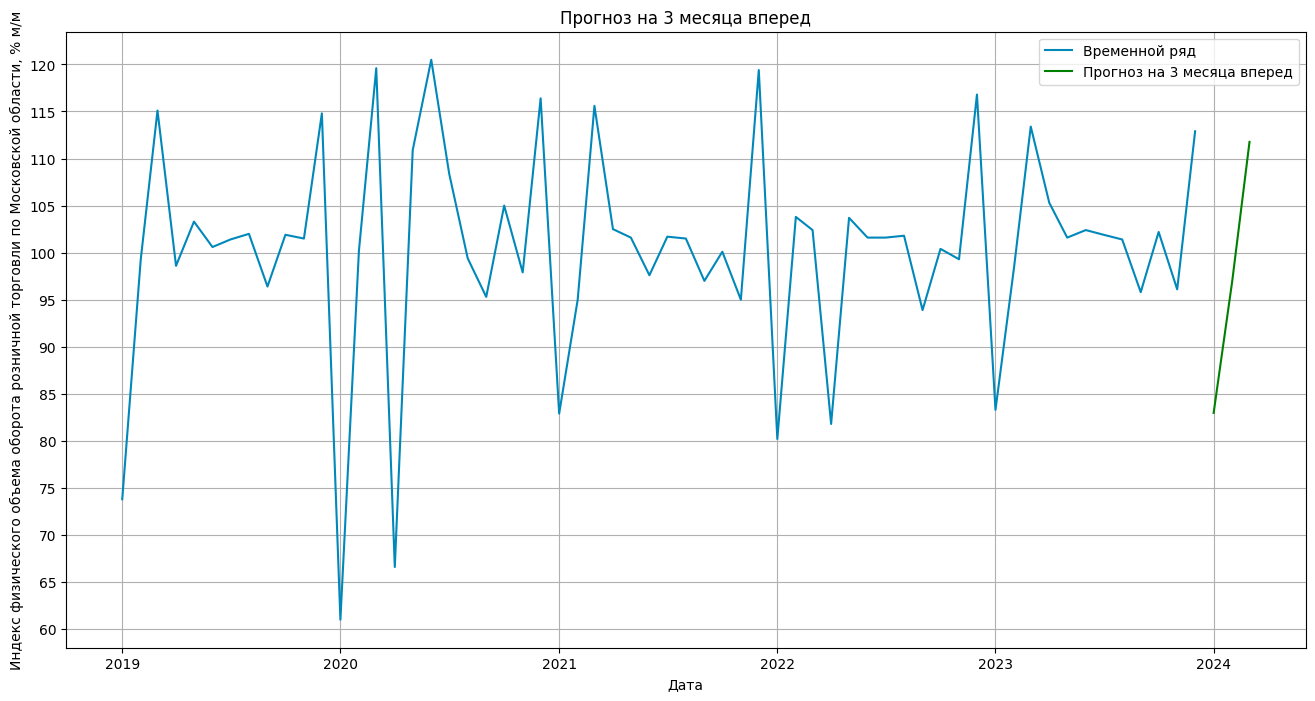

In [6]:
df = pd.read_excel('Задание.xlsx')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)
data_index = df[['Дата', 'Индекс физического объема оборота розничной торговли по Московской области, % м/м']].copy()

with open('demand_mo_mom.pkl', 'rb') as f:
    SARIMA_result = pickle.load(f)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(60, 160+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс физического объема оборота розничной торговли по Московской области, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс физического объема оборота розничной торговли по Московской области, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

# Инвестиции

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


15    123.316227
16    119.043904
17    121.453897
Name: predicted_mean, dtype: float64


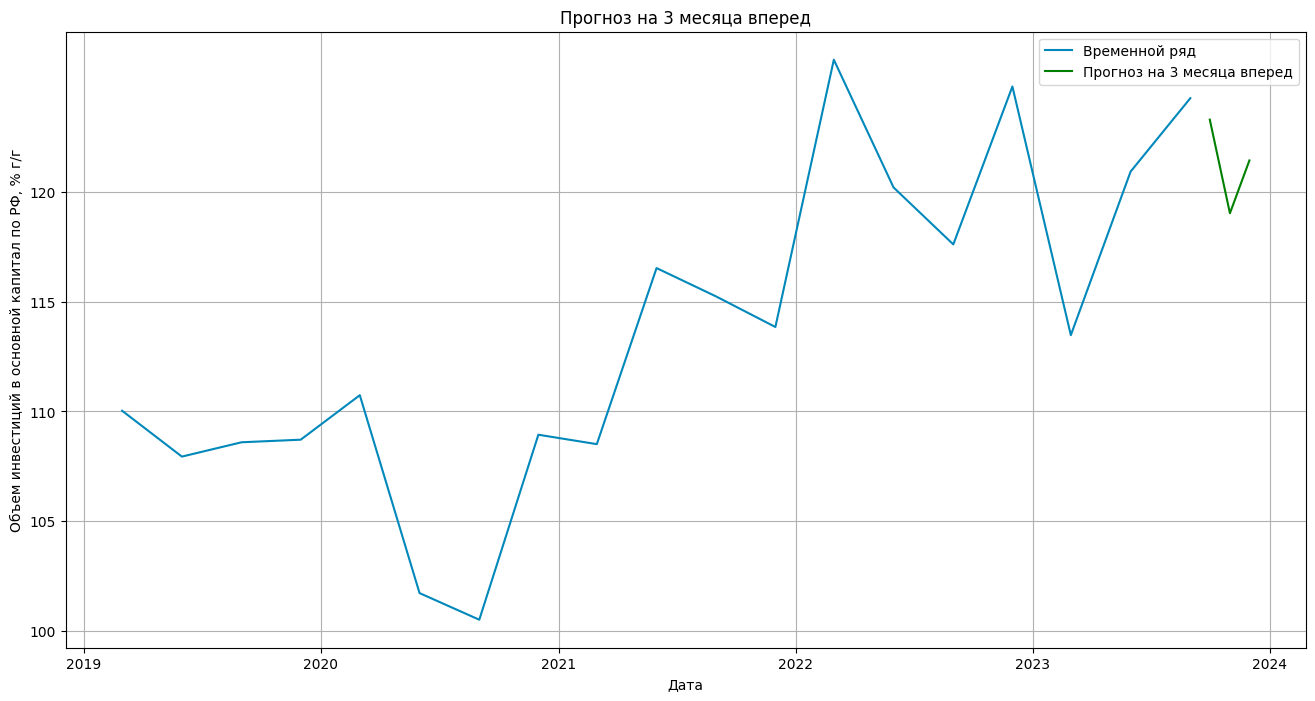

In [10]:
df = pd.read_excel('Задание.xlsx', sheet_name='Инвестиции')

def quarter_to_date(quarter_str):
        parts = quarter_str.split()
        year = parts[-1]
        quarter = parts[0]
        month = int(quarter) * 3 
        date_string = f'{year}-{month:02d}-01'
        return parser.parse(date_string)

df['Дата'] = df['Дата'].apply(quarter_to_date)

df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)
data_index = df[['Дата', 'Объем инвестиций в основной капитал по РФ, % г/г']].copy()

with open('investment_rf_yoy.pkl', 'rb') as f:
    SARIMA_result = pickle.load(f)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Объем инвестиций в основной капитал по РФ, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по РФ, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


15    122.280354
16    112.689355
17    122.216839
Name: predicted_mean, dtype: float64


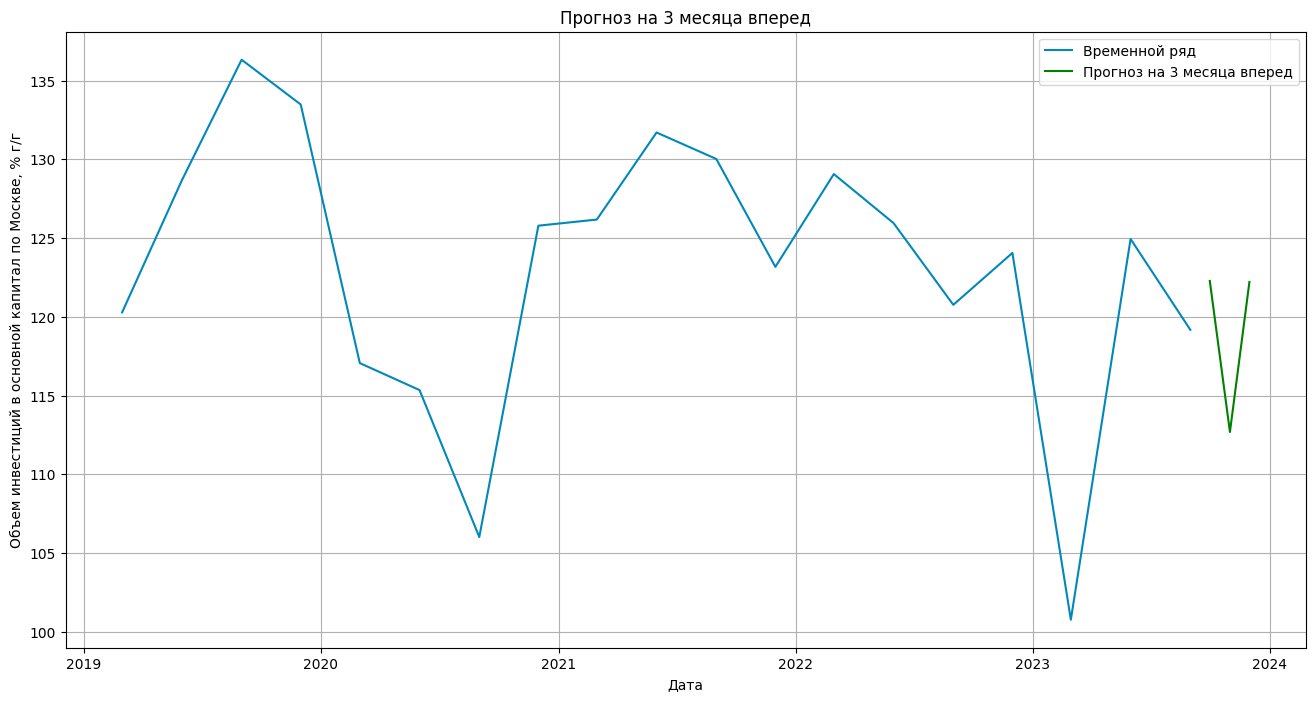

In [12]:
df = pd.read_excel('Задание.xlsx', sheet_name='Инвестиции')

def quarter_to_date(quarter_str):
        parts = quarter_str.split()
        year = parts[-1]
        quarter = parts[0]
        month = int(quarter) * 3 
        date_string = f'{year}-{month:02d}-01'
        return parser.parse(date_string)

df['Дата'] = df['Дата'].apply(quarter_to_date)

df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)
data_index = df[['Дата', 'Объем инвестиций в основной капитал по Москве, % г/г']].copy()

with open('investment_m_yoy.pkl', 'rb') as f:
    SARIMA_result = pickle.load(f)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 160+1, 5))
plt.plot(data_index['Дата'], data_index['Объем инвестиций в основной капитал по Москве, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по Москве, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


15    121.599629
16    114.849041
17    120.571249
Name: predicted_mean, dtype: float64


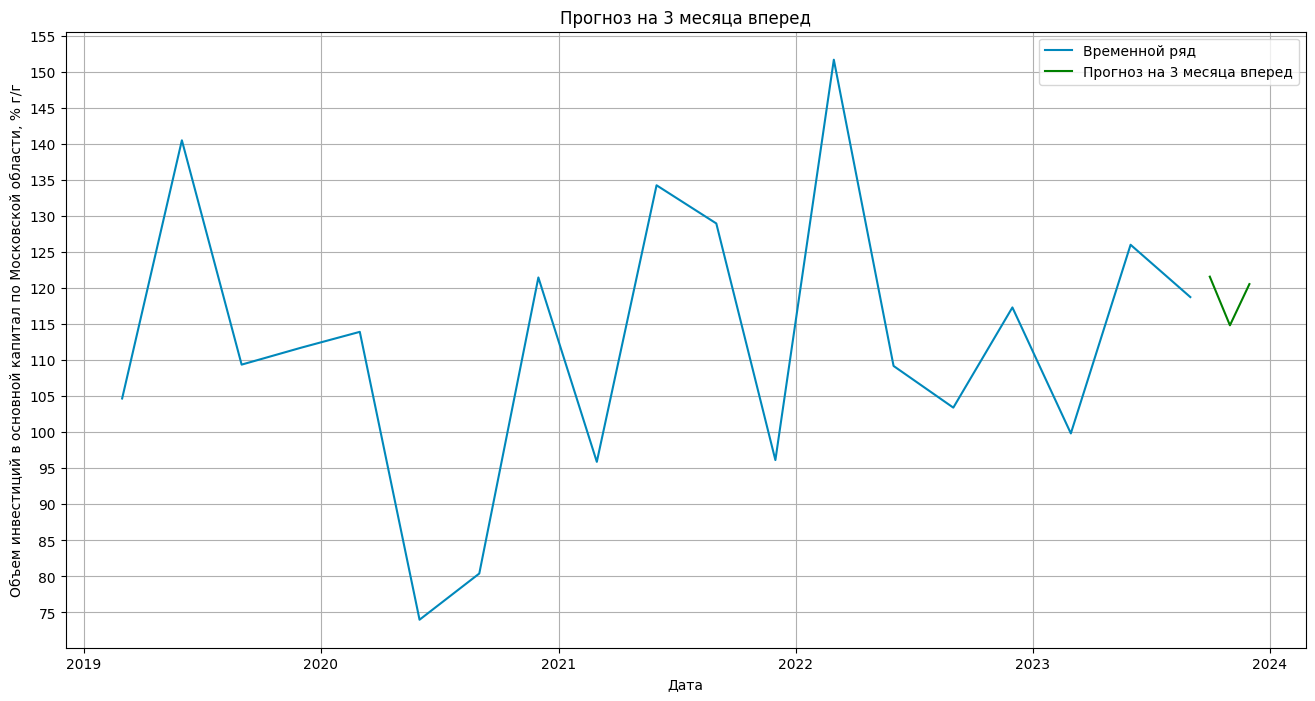

In [13]:
df = pd.read_excel('Задание.xlsx', sheet_name='Инвестиции')

def quarter_to_date(quarter_str):
        parts = quarter_str.split()
        year = parts[-1]
        quarter = parts[0]
        month = int(quarter) * 3 
        date_string = f'{year}-{month:02d}-01'
        return parser.parse(date_string)

df['Дата'] = df['Дата'].apply(quarter_to_date)

df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)
data_index = df[['Дата', 'Объем инвестиций в основной капитал по Московской области, % г/г']].copy()

with open('investment_mo_yoy.pkl', 'rb') as f:
    SARIMA_result = pickle.load(f)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 160+1, 5))
plt.plot(data_index['Дата'], data_index['Объем инвестиций в основной капитал по Московской области, % г/г'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Объем инвестиций в основной капитал по Московской области, % г/г')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

# Производство

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     79.011386
49     98.667459
50    111.619514
Name: predicted_mean, dtype: float64


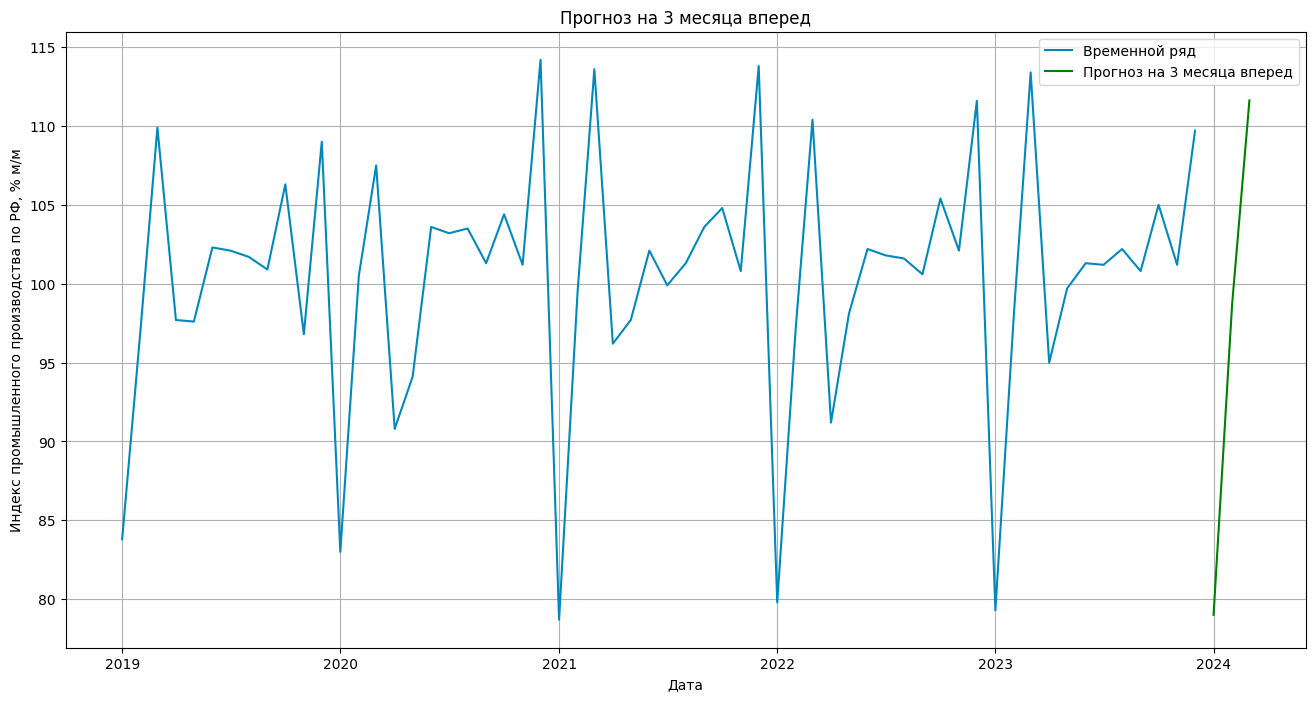

In [14]:
df = pd.read_excel('Задание.xlsx', sheet_name='Производство')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)
data_index = df[['Дата', 'Индекс промышленного производства по РФ, % м/м']].copy()

with open('production_rf_mom.pkl', 'rb') as f:
    SARIMA_result = pickle.load(f)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс промышленного производства по РФ, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по РФ, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     85.093449
49    105.942001
50    106.642014
Name: predicted_mean, dtype: float64


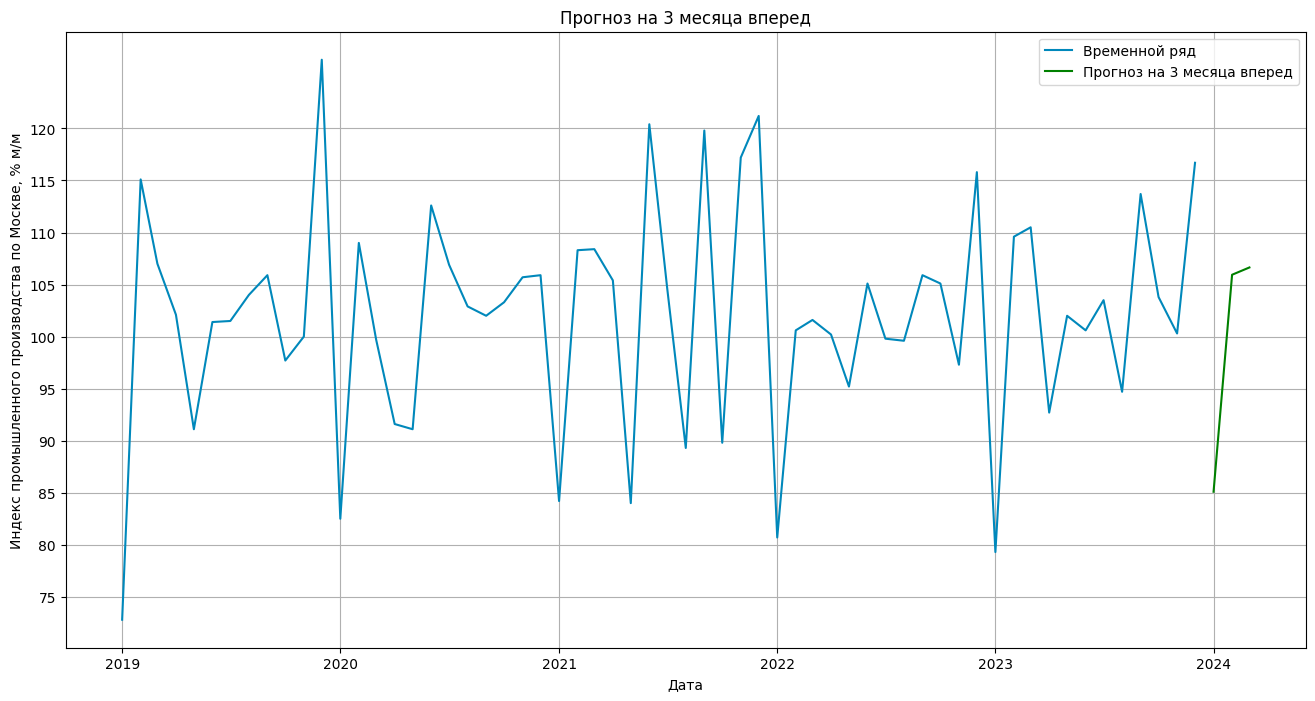

In [15]:
df = pd.read_excel('Задание.xlsx', sheet_name='Производство')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)
data_index = df[['Дата', 'Индекс промышленного производства по Москве, % м/м']].copy()

with open('production_m_mom.pkl', 'rb') as f:
    SARIMA_result = pickle.load(f)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(70, 120+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс промышленного производства по Москве, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Москве, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()

c:\Users\днс\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['freq']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


48     69.555498
49    108.455341
50    110.142379
Name: predicted_mean, dtype: float64


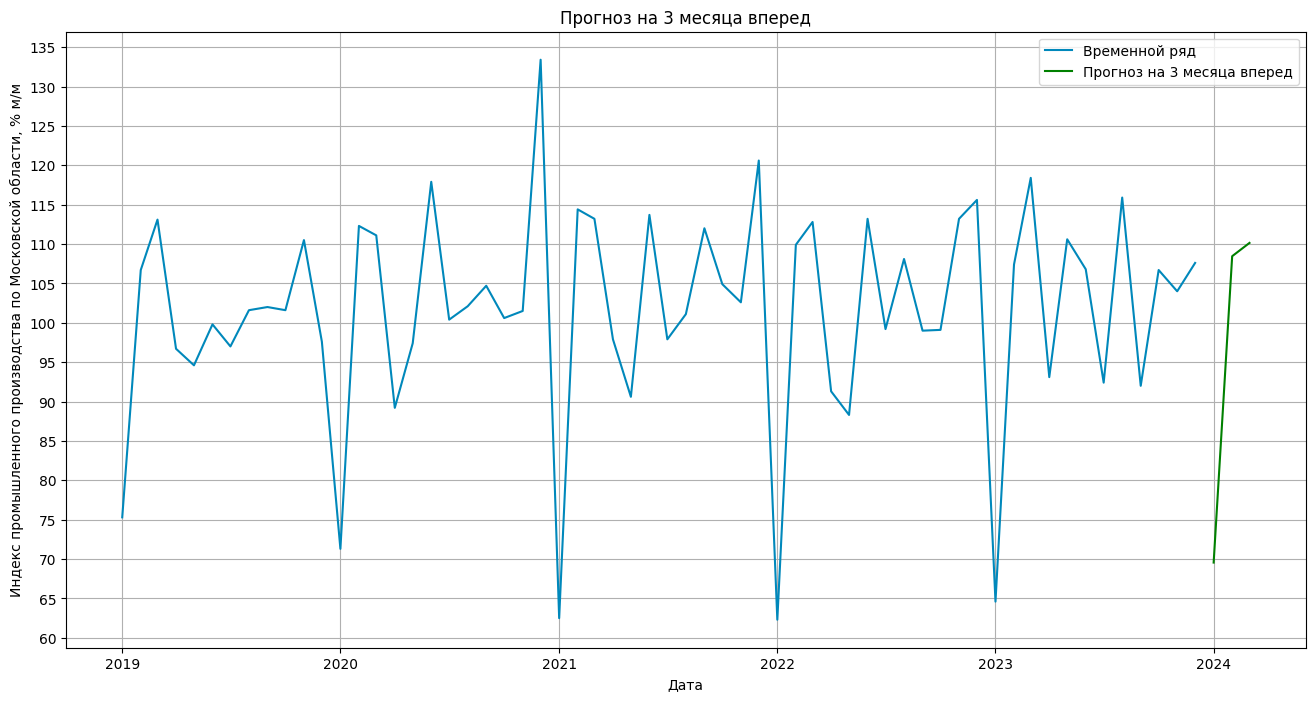

In [17]:
df = pd.read_excel('Задание.xlsx', sheet_name='Производство')
df['Дата'] = pd.to_datetime(df['Дата'])
df.dropna(inplace=True)
data_index = df[['Дата', 'Индекс промышленного производства по Московской области, % м/м']].copy()

with open('production_mo_mom.pkl', 'rb') as f:
    SARIMA_result = pickle.load(f)

last_date = data_index['Дата'].iloc[-1]
start_of_next_month = last_date + pd.offsets.MonthBegin(1)
forecast_dates = pd.date_range(start=start_of_next_month, periods=3, freq=pd.offsets.MonthBegin(1))

steps=3
forecast = SARIMA_result.get_forecast(steps=3, freq=pd.offsets.MonthBegin(1))

print(forecast.predicted_mean)

plt.figure(figsize=(16, 8))
plt.yticks(np.arange(60, 135+1, 5))
plt.plot(data_index['Дата'], data_index['Индекс промышленного производства по Московской области, % м/м'], '#0088BB', label='Временной ряд')
plt.plot(forecast_dates, forecast.predicted_mean, '#008000', label='Прогноз на 3 месяца вперед')
plt.grid(True)
plt.xlabel('Дата')  
plt.ylabel('Индекс промышленного производства по Московской области, % м/м')   
plt.title('Прогноз на 3 месяца вперед')
plt.legend()
plt.show()